<img src = "https://hacktiv8.com/assets/img/logos/hacktiv8-text-black.svg" width = 400>
<h1 align=center><font size = 5>Hacktiv8 Online PFDS Projects 1 // Statistical Treatment for Datasets</font></h1>

## NYC Property Sales Introduction

The aim of this projects is to introduce you to practical statistic with Python as concrete and as consistent as possible. Using what you’ve learned; download the NYC Property Sales Dataset from Kaggle. This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

* `BOROUGH`: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
* `BLOCK`; `LOT`: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
* `BUILDING CLASS AT PRESENT` and `BUILDING CLASS AT TIME OF SALE`: The type of building at various points in time.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

* Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
* This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

Formulate a question and derive a statistical hypothesis test to answer the question. You have to demonstrate that you’re able to make decisions using data in a scientific manner. Examples of questions can be:

* Is there a difference in unit sold between property built in 1900-2000 and 2001 so on?
* Is there a difference in unit sold based on building category?
* What can you discover about New York City real estate by looking at a year's worth of raw transaction records? Can you spot trends in the market?

Please make sure that you have completed the lesson for this course, namely Python and Practical Statistics which is part of this Online Program.

**Note:** You can take a look at Project Rubric below:

| Code Review |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
| Mean | Student implement mean to specifics column/data using pandas, numpy, or scipy|
| Median | Student implement median to specifics column/data using pandas, numpy, or scipy|
| Modus | Student implement modus to specifics column/data using pandas, numpy, or scipy|
| Central Tendencies | Implementing Central Tendencies through dataset |
| Box Plot | Implementing Box Plot to visualize spesific data |
| Z-Score | Implementing Z-score concept to specific data |
| Probability Distribution | Student analyzing distribution of data and gain insight from the distribution |
| Intervals | Implementing Confidence or Prediction Intervals |
| Hypotesis Testing | Made 1 Hypotesis and get conclusion from data |
| Preprocessing | Student preprocess dataset before applying the statistical treatment. |
| Does the code run without errors? | The code runs without errors. All code is functional and formatted properly. |

| Readability |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
| Well Documented | All cell in notebook are well documented with markdown above each cell explaining the code|

| Analysis |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
|Overall Analysis| Gain an insight/conclusion of overall plots that answer the hypotesis |

------------

## Exploring Datasets with Pandas

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('dataset/london_crime_by_lsoa.csv')

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


Let's view the top 5 rows of the dataset using the `head()` function.

In [3]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


We can see that we have 7 columns:

* lsoa_code: this represents a policing area
* borough: the london borough for which the statistic is related
* major_category: the major crime category
* minor_category: the minor crime category
* value: the count of the crime for that particular borough, in that particular month
* year: the year of the summary statistic
* month: the month of the summary statistic

We can immediately see that there are more than 1 lsoa_code per borough telling us that this represents a smaller more confined geographical area within a borough; this may seem straightforward and obvious, but the relationship between the variables here might help us pose some questions that we can later answer using the information available to us.

We can also veiw the bottom 5 rows of the dataset using the `tail()` function.

In [4]:
df.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


To view the dimensions of the dataframe, we use the `.shape` parameter.

In [5]:
df.shape

(13490604, 7)

How many boroughs?
Now that we have a better understanding of the data at our disposable, we can start thinking about the sort of questions that we might be able to ask.

Let's start with a simple query to get started to see how many boroughs are represented in the `crime_by_lsoa` table.

In [6]:
print(df.borough.unique())

print(len(df.borough.unique()))

print(df.year.unique())

['Croydon' 'Greenwich' 'Bromley' 'Redbridge' 'Wandsworth' 'Ealing'
 'Hounslow' 'Newham' 'Sutton' 'Haringey' 'Lambeth' 'Richmond upon Thames'
 'Hillingdon' 'Havering' 'Barking and Dagenham' 'Kingston upon Thames'
 'Westminster' 'Hackney' 'Enfield' 'Harrow' 'Lewisham' 'Brent' 'Southwark'
 'Barnet' 'Waltham Forest' 'Camden' 'Bexley' 'Kensington and Chelsea'
 'Islington' 'Tower Hamlets' 'Hammersmith and Fulham' 'Merton'
 'City of London']
33
[2016 2015 2008 2012 2010 2013 2014 2011 2009]


This tells us that we 33 boroughs that we could potentially investigate.

We can build on our first observation about the `lsoa_codes` by performing a grouping to see how many codes there are per borough.

In [7]:
borough_data = df[['borough','lsoa_code']]

codes_per_borough = borough_data.groupby('borough').count()
codes_per_borough

,lsoa_code
borough,
Barking and Dagenham,311040
Barnet,572832
Bexley,385668
Brent,490644
Bromley,523908
Camden,378432
City of London,9720
Croydon,602100
Ealing,549396


## Visualizing Data using Matplotlib

In [8]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

### Area Plot

In [9]:
Croydon_group = df.loc[df['borough'] == 'Croydon']

In [10]:
Croydon_group.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
42,E01001029,Croydon,Drugs,Possession Of Drugs,0,2010,12
43,E01001193,Croydon,Theft and Handling,Other Theft,1,2014,5
55,E01001171,Croydon,Violence Against the Person,Offensive Weapon,0,2012,12
83,E01000996,Croydon,Drugs,Drug Trafficking,0,2008,2


In [20]:
Croydon_2016 = Croydon_group.loc[(Croydon_group['year'] == 2016) & (Croydon_group['value'] == 1)]

In [21]:
Croydon_2016

,lsoa_code,borough,major_category,minor_category,value,year,month
3020,E01001096,Croydon,Criminal Damage,Criminal Damage To Dwelling,1,2016,8
3692,E01000997,Croydon,Violence Against the Person,Wounding/GBH,1,2016,3
3803,E01000979,Croydon,Theft and Handling,Theft From Shops,1,2016,9
4845,E01001047,Croydon,Violence Against the Person,Offensive Weapon,1,2016,2
4964,E01001065,Croydon,Violence Against the Person,Wounding/GBH,1,2016,5
...,...,...,...,...,...,...,...
13486506,E01001097,Croydon,Other Notifiable Offences,Other Notifiable,1,2016,6
13486938,E01001063,Croydon,Theft and Handling,Other Theft Person,1,2016,1
13488005,E01001076,Croydon,Violence Against the Person,Assault with Injury,1,2016,12
13488388,E01001049,Croydon,Criminal Damage,Criminal Damage To Dwelling,1,2016,9


In [61]:
Croydon_2016_data = Croydon_2016.groupby('month').count()
Croydon_2016_data[['value']]

,value
month,
1,869
2,817
3,862
4,895
5,919
6,855
7,937
8,856
9,864


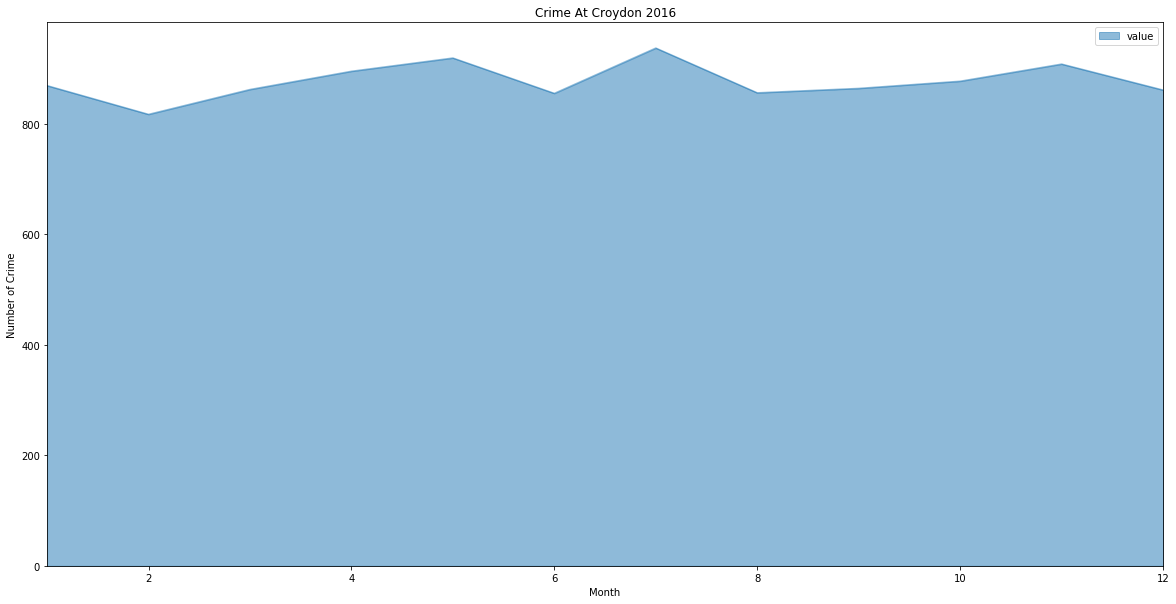

In [58]:
Croydon_2016_data[['value']].plot(kind='area', 
             stacked=False,
             figsize=(20, 10),
             )

plt.title('Crime At Croydon 2016')
plt.ylabel('Number of Crime')
plt.xlabel('Month')

plt.show()

From plot above, we can clearly see that at July, crim at Croydon reach its peak.

### Histogram

In [80]:
Croydon_2016_lsoa = Croydon_2016.groupby('lsoa_code').count()
Croydon_2016_lsoa[['value']]

,value
lsoa_code,
E01000975,79
E01000976,71
E01000977,56
E01000978,38
E01000979,55
...,...
E01001191,62
E01001192,57
E01001193,60


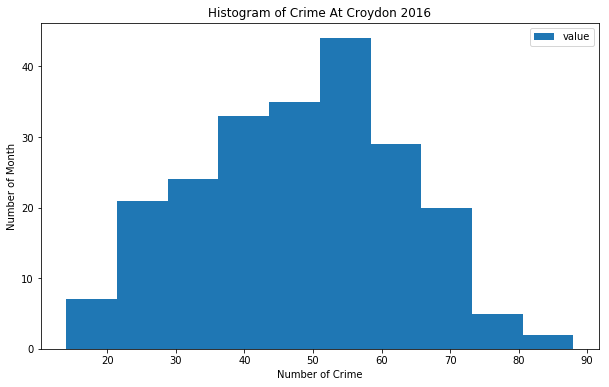

In [81]:
Croydon_2016_lsoa[['value']].plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Crime At Croydon 2016')
plt.ylabel('Number of Month')
plt.xlabel('Number of Crime')

plt.show()

### Bar Chart

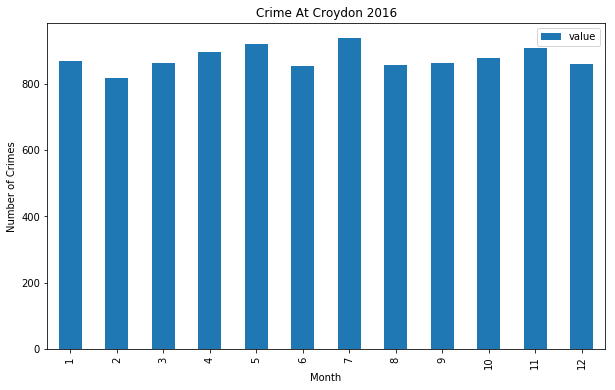

In [83]:
Croydon_2016_data[['value']].plot(kind='bar', figsize=(10, 6))

plt.xlabel('Month') # add to x-label to the plot
plt.ylabel('Number of Crimes') # add y-label to the plot
plt.title('Crime At Croydon 2016') # add title to the plot

plt.show()

## Pie Chart

In [86]:
Croydon_2016_category = Croydon_2016.groupby('major_category').count()

In [88]:
Croydon_2016_category[['value']]

,value
major_category,
Burglary,1214
Criminal Damage,1775
Drugs,494
Other Notifiable Offences,431
Robbery,485
Theft and Handling,3063
Violence Against the Person,3058


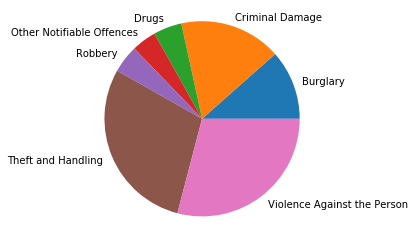

In [90]:
plt.pie(Croydon_2016_category['value'],
        labels=Croydon_2016_category.index.values)
plt.axis('equal')
plt.show()

### Folium

In [94]:
import folium

world_map = folium.Map(location=[51.528308, -0.3817765], zoom_start=9)

world_map